#### Import Statements

In [1]:
import numpy as np

#### Graph Class

In [2]:
class Graph():
    
    from random import shuffle
    from time import time
    import numpy as np
    
    def __init__(self, M):
        # Everything is based off of an adjacency matrix
        self.M = M
        
    def mkGraph(self):
        # Initialize a dictionary object for the graph
        graph = dict()
        
        # Each row in M is a key in the graph
        for i in range(len(self.M)):
            graph[i] = []
            # Add each connection and weight if not zero
            for j in range (len(self.M[i])):
                if self.M[i][j] != 0:
                    graph[i].append((j,self.M[i][j]))
        self.G = graph
        self.vertices = list(range(len(self.G)))
    
    def BFS(self):
        Color = ['w' for x in range(len(self.M))]
        Pred  = [None for x in range(len(self.M))]
        Dist  = [self.np.infty for x in range(len(self.M))]
        
        s = self.vertices[0]
        
        Color[s] = 'y'
        Dist[s]  = 0
        Pred[s]  = None
        Q = [s]
        while len(Q) != 0:
            u = Q.pop(0)
            for V in self.G[u]:
                v = V[0]
                w = V[1]
                if Color[v] == 'w':
                    Color[v] = 'y'
                    Dist[v] = Dist[u] + w
                    Pred[v] = u
                    Q.append(v)
            Color[u] = 'r'
        
        results = [(x, Dist[x], Pred[x], Color[x]) for x in range(len(Color))]
        
        return results
    
    def DFSvisit(self, u):
        #Update the start time and color of u
        self.t += 1
        self.uStart[u] = self.t
        self.uColor[u] = 'y'
        
        # neighbors are every vertex in the graph with key u
        neighbors = sorted([x[0] for x in self.G[u]])
        
        # run DFSvisit on the neighbor if it had not been visited yet
        for v in neighbors:
            if self.uColor[v] == 'w':
                self.uPred[v] = u
                self.DFSvisit(v)
        
        # Update stoptime and color for u
        self.uColor[u] = 'r'
        self.t += 1
        self.uStop[u] = self.t
        self.rt_stp = self.time()
        self.rt = (self.rt_stp - self.rt_strt)*10**3
        
    def DFS(self):
        # Initialize CPU time
        self.rt_strt = self.time()
        
        # These lists store the results of DFS
        self.uColor = ['w' for x in range(len(self.M))]
        self.uPred  = [None for x in range(len(self.M))]
        self.uStart = [None for x in range(len(self.M))]
        self.uStop  = [None for x in range(len(self.M))]
        
        # Initialize the visit time
        self.t = 0
        
        # for each vertex Perform DFSvisit
        for u in self.vertices:
            if self.uColor[u] == 'w':
                self.DFSvisit(u)
                
    def topoSort(self):
        # Topo sort requires the stop times for each vertex
        endTimes = self.uStop
        vert = self.vertices
        
        # combine the vertices and endtimes as tuples
        ts = [(vert[i],endTimes[i]) for i in range(len(vert))]
        # Sort by descending end time
        ts = sorted(ts, key=lambda x: x[1], reverse = True)
        return ts
    
    def DAG_Shotest_Path(self):
        
        self.edges = []
        for i in range(len(self.G)):
            for j in range(len(self.G[i])):
                temp = [i,self.G[i][j][0]]
                self.edges.append((temp[0], temp[1], self.G[i][j][1]))
        self.edges = set(self.edges)
        ts = [x[0] for x in self.topoSort()]

        relaxed = {ts[0]:[0,None]}
        for i in range(1,len(ts)):
            relaxed[ts[i]] = [self.np.infty, None]

        for i in range(len(ts)):
            for edge in self.edges:
                u = edge[0]
                v = edge[1]
                w = edge[2]
                if relaxed[u][0] + w < relaxed[v][0]:
                    relaxed[v][0] = relaxed[u][0] + w
                    relaxed[v][1] = u

        return relaxed
                
        
    def BellmanFord(self):
        vert = self.vertices
        
        #initialize single source [distance, predecessor]
        relaxed = {vert[0]:[0,None]}
        for i in range(1,len(vert)):
            relaxed[vert[i]] = [self.np.infty, None]
            
            
        self.edges = []
        for i in range(len(self.G)):
            for j in range(len(self.G[i])):
                temp = [i,self.G[i][j][0]]
                self.edges.append((temp[0], temp[1], self.G[i][j][1]))
        self.edges = set(self.edges)
        
        for i in range(len(vert)):
            for edge in self.edges:
                u = edge[0]
                v = edge[1]
                w = edge[2]
                if relaxed[u][0] + w < relaxed[v][0]:
                    relaxed[v][0] = relaxed[u][0] + w
                    relaxed[v][1] = u
        for edge in self.edges:
            w = edge[2]
            v = edge[1]
            u = edge[0]
            if relaxed[v][0] > relaxed[u][0] + w:
                return False
        return True, relaxed

        
    def dijkstra(self):
        vert = self.vertices

        #initialize single source [distance, predecessor]
        relaxed = {vert[0]:[0,None]}
        for i in range(1,len(vert)):
            relaxed[vert[i]] = [self.np.infty, None]

        # Initialize the Q with the first vertex [vertex, weight]
        Q = [(vert[0],0)]

        while len(Q) != 0:

            # Extract the first element in the Min Q
            U = Q.pop(0)
            u = U[0]
            
            # check the adjacent vertices and update
            for V in self.G[u]:
                v = V[0]
                w = V[1]
                if relaxed[u][0] + w < relaxed[v][0]:
                    relaxed[v][0] = relaxed[u][0] + w
                    relaxed[v][1] = u

            # Update the min Q
            for con in self.G[u]:
                Q.append(con)
                Q = sorted(Q, key=lambda x: x[1])

        return relaxed
    
    def FW(self):
        M = self.M.astype('float')
        # init M with infinity everywhere except the diagonal and where weights exist
        for i in range(len(M)):
            for j in range(len(M)):
                if i == j:
                    M[i][j] = 0
                elif M[i][j] == 0:
                    M[i][j] = self.np.infty

        #List to keep track of previous matrix
        D = [M]
        # Update the arrays with the lowest connection
        n = len(M)
        for k in range(1,n):
            Dk = D[k-1]
            for i in range(n):
                for j in range(n):
                    Dk[i][j] = min([D[k-1][i][j], D[k-1][i][k] + D[k-1][k][j]])
            D.append(Dk)
        return D[n-1]
    
    def getMaxTime(self):
        try:
            return max(self.uStop)
        except NameError:
            print('DFS must be called first.')
    
    def getRt(self):
        try:
            return self.rt
        except NameError:
            print('DFS must be called first.')
    
    def showGraph(self):
        try:
            print(self.G)
        except NameError:
            self.mkGraph()
            return self.G
        
    def getEdges(self):
        try:
            return self.edges
        except:
            self.edges = []
            for i in range(len(self.G)):
                for j in range(len(self.G[i])):
                    temp = sorted([i,self.G[i][j][0]])
                    self.edges.append((temp[0], temp[1], self.G[i][j][1]))
            self.edges = set(self.edges)
            return self.edges
            
    def getEdgesNW(self):
        edges = []
        for i in range(len(self.G)):
            for j in range(len(self.G[i])):
                temp = sorted([i,self.G[i][j][0]])
                edges.append((temp[0], temp[1]))
        edges = list(set(edges))
        return edges
        
    def __str__(self):
        return 'This object contains the graph and\nassociated method for the following\nmatrix\n{}'.format(M)

### Graph Edges

In [3]:
np.random.seed(123)
EL = []
N = 10
for k in range(1,6):
    EL.append([0,k,np.random.randint(1,N)])
for k in range(1,11):
    for j in range(11,15):
        T1=np.random.randint(0,2)
        if T1==1:
            EL.append([k,j,np.random.randint(1,N)])
for k in range(11,15):
    for j in range(15,20):
        T2=np.random.randint(0,2)
        if T2==1:
            EL.append([k,j,np.random.randint(1,N)])
for k in range(15,20):
    EL.append([k,20, np.random.randint(1,N)])

In [4]:
EL

[[0, 1, 3],
 [0, 2, 3],
 [0, 3, 7],
 [0, 4, 2],
 [0, 5, 4],
 [1, 12, 7],
 [1, 13, 1],
 [1, 14, 1],
 [2, 13, 4],
 [3, 11, 5],
 [4, 11, 8],
 [4, 12, 3],
 [4, 14, 3],
 [5, 12, 9],
 [5, 13, 1],
 [5, 14, 4],
 [7, 11, 6],
 [7, 14, 3],
 [8, 11, 9],
 [8, 12, 6],
 [8, 14, 3],
 [9, 14, 3],
 [10, 12, 5],
 [10, 14, 4],
 [11, 19, 5],
 [12, 15, 7],
 [12, 16, 2],
 [12, 17, 6],
 [12, 18, 3],
 [13, 16, 3],
 [13, 17, 2],
 [13, 18, 6],
 [13, 19, 1],
 [14, 16, 2],
 [14, 18, 4],
 [14, 19, 6],
 [15, 20, 8],
 [16, 20, 3],
 [17, 20, 4],
 [18, 20, 4],
 [19, 20, 4]]

# Problem 1

The following is the adjacency matrix for the list of edges given.

In [5]:
AM = np.array([[0 for n in range(21)] for m in range(21)])

In [6]:
for edge in EL:
    i,j,w = edge[0],edge[1],edge[2]
    AM[i][j] = w

In [7]:
AM

array([[0, 3, 3, 7, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 3, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 1, 4, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 6, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 4, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 2, 6, 3, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 6,

# Problem 2

In [8]:
G = Graph(AM)

In [9]:
G.mkGraph()

Running Floyd Warshall on the adjacency matrix shows that the all pairs shortest path is 9.

In [10]:
print(G.FW()[0][20])

9.0


I defined a function that returned the shortest path as a list of vertices.

In [11]:
def listShortestPath(R, last, first):
    end = last 
    nxt = R[last][1]
    order = [end, nxt]
    while nxt != first:
        nxt = R[nxt][1]
        order.append(nxt)
    
    order.reverse()
    return order

Running Dijkstra's algorithm gives a path with length 9 that runs through vertex 19.

In [12]:
dijPath = G.dijkstra()
dijPath

{0: [0, None],
 1: [3, 0],
 2: [3, 0],
 3: [7, 0],
 4: [2, 0],
 5: [4, 0],
 6: [inf, None],
 7: [inf, None],
 8: [inf, None],
 9: [inf, None],
 10: [inf, None],
 11: [10, 4],
 12: [5, 4],
 13: [4, 1],
 14: [4, 1],
 15: [12, 12],
 16: [6, 14],
 17: [6, 13],
 18: [8, 14],
 19: [5, 13],
 20: [9, 19]}

In [13]:
listShortestPath(dijPath,20,0)

[0, 1, 13, 19, 20]

Running Bellman-Ford also returns a path that runs through 19 with length 9 that follows the same order so there seems to be one shortest path.

In [14]:
BellPath = G.BellmanFord()
BellPath

(True,
 {0: [0, None],
  1: [3, 0],
  2: [3, 0],
  3: [7, 0],
  4: [2, 0],
  5: [4, 0],
  6: [inf, None],
  7: [inf, None],
  8: [inf, None],
  9: [inf, None],
  10: [inf, None],
  11: [10, 4],
  12: [5, 4],
  13: [4, 1],
  14: [4, 1],
  15: [12, 12],
  16: [6, 14],
  17: [6, 13],
  18: [8, 14],
  19: [5, 13],
  20: [9, 19]})

In [15]:
listShortestPath(BellPath[1],20,0)

[0, 1, 13, 19, 20]

# Problem 3

First, I created the matrix of probabilities; AM_prob.

In [16]:
AM_prob = AM.astype('float')

In [17]:
for i in range(len(AM_prob)):
    for j in range(len(AM_prob)):
        if AM_prob[i][j] != 0:
            AM_prob[i][j] = 1.0/AM_prob[i][j]

I used Dijkstra's algorithm to identify the shorest path and saved it to a variable; R. Then I called the listShortestPath function and saved the output to a variable.

In [18]:
R = G.dijkstra()

In [19]:
path = listShortestPath(R, 20, 0)

The following multiplies the probabilities associated with traversing the path (since they are independant).

In [20]:
pathProb = 1
for i in range(len(path)-1):
    m = path[i]
    n = path[i+1]
    P = AM_prob[m][n]
    pathProb *= P

In [21]:
pathProb

0.08333333333333333

# Problem 4

In [22]:
#Initialization of M
M = (AM + AM.T) - (AM + AM.T).diagonal()

In [23]:
M

array([[0, 3, 3, 7, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 1, 1, 0, 0, 0, 0, 0, 0],
       [3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0],
       [7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 3, 0, 3, 0, 0, 0, 0, 0, 0],
       [4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 1, 4, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 6, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 4, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 5, 8, 0, 0, 6, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0],
       [0, 7, 0, 0, 3, 9, 0, 0, 6, 0, 5, 0, 0, 0, 0, 7, 2, 6, 3, 0, 0],
       [0, 1, 4, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 6,

In [24]:
GM = Graph(M)

In [25]:
GM.mkGraph()

In [26]:
result = GM.FW()

The maximum all pairs shortest path for the undirected graph is 22. This was found using  the Floyd Warshall algorithm.

In [27]:
result[np.isfinite(result)].max()

22.0

# Problem 5

In [28]:
from collections import defaultdict 
   
#This class represents a directed graph using adjacency matrix representation 
class Graph2: 
   
    def __init__(self,graph): 
        self.graph = graph # residual graph 
        self. ROW = len(graph) 
        #self.COL = len(gr[0]) 
          
   
    '''Returns true if there is a path from source 's' to sink 't' in 
    residual graph. Also fills parent[] to store the path '''
    def BFS(self,s, t, parent): 
  
        # Mark all the vertices as not visited 
        visited =[False]*(self.ROW) 
          
        # Create a queue for BFS 
        queue=[] 
          
        # Mark the source node as visited and enqueue it 
        queue.append(s) 
        visited[s] = True
           
         # Standard BFS Loop 
        while queue: 
  
            #Dequeue a vertex from queue and print it 
            u = queue.pop(0) 
          
            # Get all adjacent vertices of the dequeued vertex u 
            # If a adjacent has not been visited, then mark it 
            # visited and enqueue it 
            for ind, val in enumerate(self.graph[u]): 
                if visited[ind] == False and val > 0 : 
                    queue.append(ind) 
                    visited[ind] = True
                    parent[ind] = u 
  
        # If we reached sink in BFS starting from source, then return 
        # true, else false 
        return True if visited[t] else False
              
      
    # Returns tne maximum flow from s to t in the given graph 
    def FordFulkerson(self, source, sink): 
  
        # This array is filled by BFS and to store path 
        parent = [-1]*(self.ROW) 
  
        max_flow = 0 # There is no flow initially 
  
        # Augment the flow while there is path from source to sink 
        while self.BFS(source, sink, parent) : 
  
            # Find minimum residual capacity of the edges along the 
            # path filled by BFS. Or we can say find the maximum flow 
            # through the path found. 
            path_flow = float("Inf") 
            s = sink 
            while(s !=  source): 
                path_flow = min (path_flow, self.graph[parent[s]][s]) 
                s = parent[s] 
  
            # Add path flow to overall flow 
            max_flow +=  path_flow 
  
            # update residual capacities of the edges and reverse edges 
            # along the path 
            v = sink 
            while(v !=  source): 
                u = parent[v] 
                self.graph[u][v] -= path_flow 
                self.graph[v][u] += path_flow 
                v = parent[v] 
  
        return max_flow 

I first tested its function using the graph from class which should have a maximal flow of 7.  I performed as expected.

In [29]:
MF = np.array([[0,1,4,2,0,0,0],
               [0,0,0,0,5,0,0],
               [0,1,0,1,2,4,0],
               [0,0,0,0,0,7,0],
               [0,0,0,0,0,0,5],
               [0,0,0,0,0,0,3],
               [0,0,0,0,0,0,0]])

In [30]:
G = Graph2(MF)

In [31]:
G.FordFulkerson(0,6)

7

Creating a Graph2 instance with the original adjacency matrix AM and running Ford Fulkerson will give the maximum flow acheivable from 0 to 20.

In [32]:
G2 = Graph2(AM)

In [33]:
# The maximum flow from 0 to 20
G2.FordFulkerson(0,20)

16

### Calculating required time

In [34]:
class ProgTimer():
    
    def __init__(self, func):
        self.func = func
    
    def progTimer(self, *args):
        from time import time
        from tqdm import tqdm
        RTs = []
        for i in tqdm(range(10000)):
            start_time = time()
            self.func(*args)
            stop_time = time()
            RTs.append(stop_time-start_time)
        return (sum(RTs)/10000)*10e3

In [35]:
timer = ProgTimer(G2.FordFulkerson)
time = timer.progTimer(0,20)

100%|██████████| 10000/10000 [00:00<00:00, 48124.26it/s]


In [36]:
numEdges = len(EL)
numVert = len(AM)

In [37]:
print(f'It took {round(time,3)} milliseconds to calculate the maximum flow for a graph\n containing {numEdges} edges and {numVert} vertices.')

It took 0.203 milliseconds to calculate the maximum flow for a graph
 containing 41 edges and 21 vertices.


Considering that this algorithm uses breadth first search, this implementation of the Ford Fulkerson method is actually the Edmonds-Karp algorithm which should run in $O(VE^2)$ time.

# Problem 6

I created a function that uses the following variables to generate the edges of larger graphs by replacing 20 with n.

In [38]:
# This is to show that the results of these calculation with 20 result in the
# same numbers used in the original graph.
a = int(0.25*20) + 1
b = int(0.50*20) + 1
c = int(0.75*20)
print(a,b,c)

6 11 15


In [39]:
def genEdges(n):
    import numpy as np
    np.random.seed(123)
    a = int(0.25*n) + 1
    b = int(0.50*n) + 1
    c = int(0.75*n)
    EL = []
    N = 10
    for k in range(1,a):
        EL.append([0,k,np.random.randint(1,N)])
    for k in range(1,b):
        for j in range(b,c):
            T1=np.random.randint(0,2)
            if T1==1:
                EL.append([k,j,np.random.randint(1,N)])
    for k in range(b,c):
        for j in range(c,n):
            T2=np.random.randint(0,2)
            if T2==1:
                EL.append([k,j,np.random.randint(1,N)])
    for k in range(c,n):
        EL.append([k,20, np.random.randint(1,N)])
        
    return EL

This test shows that the altered function generates the same list as the original with input 20.

In [40]:
EL2 = genEdges(20)

In [41]:
EL2 == EL

True

### Runtime Tests

Since the theoretical runtime of the Edmonds-Karp algorithm is $O(VE^2)$, I expect to see that the runtime plot of the function with graphs of increasing size should be polynomial.

In [42]:
GF = Graph(MF)

In [43]:
GF.mkGraph()

In [44]:
test = [41, 61, 81, 101, 121, 141, 161]
times = []
for N in test:
    EL = genEdges(N-1)
    AM = np.array([[0 for n in range(N)] for m in range(N)])
    for edge in EL:
        i,j,w = edge[0],edge[1],edge[2]
        AM[i][j] = w
    G = Graph2(AM)
    
    timer = ProgTimer(G.FordFulkerson)
    times.append(timer.progTimer(0,N-1))

100%|██████████| 10000/10000 [00:27<00:00, 363.84it/s]


In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

Indeed, the line of best fit that most closely fits the runtime is polynomial.

Text(0, 0.5, 'Milliseconds')

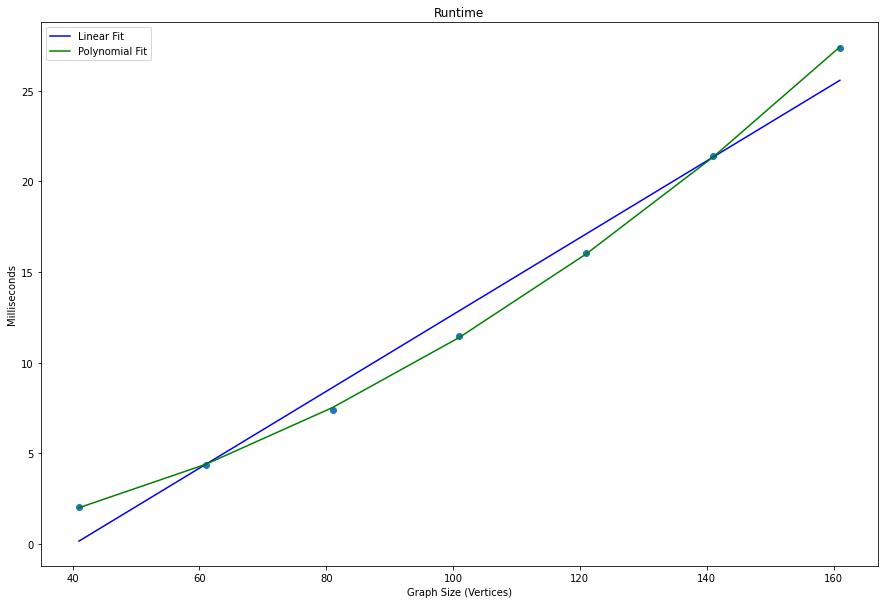

In [46]:
plt.figure(figsize=(15,10))
test = np.array(test).astype('float')
ml, bl = np.polyfit(test,times,1)
m2, b2, c2 = np.polyfit(test,times,2)
a3, b3, c3, d3 = np.polyfit(test,times,3)
plt.plot(test,times, 'o')
plt.plot(test, ml*test+bl, color='blue', label='Linear Fit')
plt.plot(test, m2*test**2 + b2*test + c2, color='green', label='Polynomial Fit')
plt.title('Runtime')
plt.legend()
plt.xlabel('Graph Size (Vertices)')
plt.ylabel('Milliseconds')